# GlobalGiving Partner Retention Analysis

What makes nonprofits stick with GlobalGiving? This analysis is intended to provide some insight on that question since better understanding of partner retention can be used to support design of programs to foster longer-term relationships. This analysis is specifically intended to answer two questions: 
1. What metrics might we use to describe organization retention based on this data?
1. How might you summarize this data such that a non-technical user could track
changes on a monthly basis?

## Import packages and set up the environment

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

## Read in the data

In [304]:
wd = '/Users/Megan/Documents/GlobalGiving/' +\
     'GlobalGiving Retention Analysis/'
raw_data = pd.read_csv(wd + 'globalgiving_retention_data.csv',
                      parse_dates=['original_vetting_approval_date', 
                                   'most_recent_vetting_approval_date',
                                   'vetting_expiration_date',
                                   'earliest_project_created_date',
                                   'most_recent_project_created_date',
                                   'earliest_project_deactivation_date',
                                   'most_recent_project_deactivation_date', 
                                   'last_login',
                                   'most_recent_field_visit_date'])

## Initial data exploration- identify any potential data issues, better understand the data

Get all the column names listed

In [305]:
raw_data.columns

Index(['id', 'name', 'status', 'country_of_registration', 'year_founded',
       'original_vetting_approval_date', 'most_recent_vetting_approval_date',
       'vetting_expiration_date', 'approx_annual_budget',
       'number_of_currently_active_projects', 'number_of_funded_projects',
       'number_of_retired_projects', 'earliest_project_created_date',
       'most_recent_project_created_date',
       'earliest_project_deactivation_date',
       'most_recent_project_deactivation_date', 'last_login',
       'completed_accelerator_program', 'number_of_field_visits',
       'most_recent_field_visit_date', 'all_time_funds_raised',
       'all_time_unique_donors', 'acquisition_source_category',
       'all_time_unque_project_themes', 'active_contacts'],
      dtype='object')

Checked if there are any duplicates in the name column, to make sure the same partner organization is not accidently included twice. After an initial look at the records with duplicated name values, it seems like the combination of name and country_of_registration may be the more accurate indicator of actual duplicates since different arms of an organization operating in different contries could we captured separately. There are 44 occurances of records with the same name and country_of_registration. In future work I would work with folks more familiar with these data to determine if any of these records should be removed if the same organization is inappropriately being included twice.

In [306]:
raw_data.name.duplicated().any()

True

In [307]:
raw_data.name.duplicated().value_counts()

False    19697
True        57
Name: name, dtype: int64

In [308]:
raw_data[raw_data[['name', 'country_of_registration']].duplicated(keep=False)].sort_values('name')

,id,name,status,country_of_registration,year_founded,original_vetting_approval_date,most_recent_vetting_approval_date,vetting_expiration_date,approx_annual_budget,number_of_currently_active_projects,...,most_recent_project_deactivation_date,last_login,completed_accelerator_program,number_of_field_visits,most_recent_field_visit_date,all_time_funds_raised,all_time_unique_donors,acquisition_source_category,all_time_unque_project_themes,active_contacts
8851,35435,Aarohi,Partner,India,2000.0,2016-08-10,2018-09-14,2020-09-14,97245.0,1.0,...,NaT,2020-09-14 05:04:56,1,1.0,2017-09-03,50881.85,186,google_ads,"Child Protection,Education,Physical Health",3
2894,11245,Aarohi,Partner,India,1992.0,2012-03-20,2018-07-17,2020-12-17,549319.0,3.0,...,2016-10-14 11:02:51,2020-08-25 05:13:08,1,2.0,2019-06-16,88471.44,434,misc,"Child Protection,Economic Growth,Education,Eco...",2
15677,62971,Ainsworth Foundation,Emerging,United States,1994.0,2019-04-12,2019-04-12,2021-04-12,258459.0,NaN,...,NaT,2019-04-03 01:48:01,0,NaN,NaT,0.00,0,corporate,Education,2
960,4840,Ainsworth Foundation,Delinquent - Due Diligence,United States,1994.0,2010-05-28,2014-08-14,2016-08-14,NaN,0.0,...,2016-08-15 23:59:59,2016-07-19 18:11:39,0,NaN,NaT,15925.00,11,blank,Education,1
15127,60412,Art for Refugees in Transition,Emerging,United States,2003.0,NaT,NaT,2021-02-16,47000.0,NaN,...,NaT,2020-08-11 15:04:18,0,NaN,NaT,0.00,0,direct_search,"Child Protection,Gender Equality,End Human Tra...",1
19085,80245,Art for Refugees in Transition,Emerging,United States,2003.0,2020-08-27,2020-08-27,2022-08-27,12000.0,0.0,...,NaT,2020-09-04 18:33:49,0,NaN,NaT,0.00,0,direct_search,"Child Protection,Education,Arts and Culture",2
17703,73268,Associacao ChildrensAid,Emerging,Brazil,2010.0,2020-02-18,2020-02-18,2022-02-18,115000.0,NaN,...,NaT,2020-03-25 17:25:00,0,NaN,NaT,0.00,0,direct_search,"Child Protection,Climate Action,Education,Ecos...",2
13443,53967,Associacao ChildrensAid,Emerging,Brazil,2010.0,2019-08-07,2019-12-19,2021-12-19,87241.0,NaN,...,NaT,2020-03-25 17:25:00,0,NaN,NaT,0.00,0,direct_search,"Child Protection,Economic Growth,Education,Eco...",1
17604,72802,"California Vocations, Inc.",Partner,United States,1984.0,2019-11-21,2019-11-21,2021-11-21,8173857.0,NaN,...,NaT,2020-03-09 18:26:37,0,NaN,NaT,50000.00,1,corporate,"Education,Physical Health,Justice and Human Ri...",1
18206,75267,"California Vocations, Inc.",Emerging,United States,1984.0,2020-02-06,2020-02-06,2022-02-06,7000000.0,NaN,...,NaT,2020-03-09 18:26:37,0,NaN,NaT,0.00,0,gg_project,"Education,Physical Health,Justice and Human Ri...",1


In [309]:
raw_data[['name', 'country_of_registration']].duplicated().sum()

44

Count how many partners have each status. Use this to make sure there are no NULL values for this column we will likely use to calculate retention.

In [310]:
raw_data.status.value_counts()

Delinquent - Due Diligence    10044
Emerging                       4761
Partner                        3252
Leader                          951
Superstar                       746
Name: status, dtype: int64

In [311]:
raw_data.describe()

,id,year_founded,approx_annual_budget,number_of_currently_active_projects,number_of_funded_projects,number_of_retired_projects,completed_accelerator_program,number_of_field_visits,all_time_funds_raised,all_time_unique_donors,active_contacts
count,19754.000000,19284.000000,1.855200e+04,8657.000000,8657.000000,8657.000000,19754.000000,1647.000000,1.975400e+04,19754.000000,19754.000000
mean,40124.682444,1993.267527,3.080572e+07,0.852027,0.752686,0.799815,0.173129,1.511840,1.900337e+04,60.321454,1.443505
std,23484.272158,103.119640,2.069269e+09,3.240574,5.927877,4.940684,0.378369,0.869183,1.339661e+05,327.981227,1.166394
min,8.000000,0.000000,-1.020609e+06,0.000000,0.000000,0.000000,0.000000,1.000000,-1.758000e+01,0.000000,0.000000
25%,17994.750000,1995.000000,2.150000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000
50%,38878.500000,2006.000000,1.219390e+05,0.000000,0.000000,0.000000,0.000000,1.000000,4.001000e+01,1.000000,1.000000
75%,59251.250000,2012.000000,7.317235e+05,1.000000,0.000000,1.000000,0.000000,2.000000,5.800000e+03,17.000000,2.000000
max,86245.000000,2020.000000,2.784558e+11,264.000000,383.000000,254.000000,1.000000,8.000000,1.069578e+07,17346.000000,29.000000


In [312]:
raw_data.most_recent_vetting_approval_date.min()

Timestamp('2004-06-16 00:00:00')

In [313]:
raw_data.most_recent_vetting_approval_date.max()

Timestamp('2020-09-16 00:00:00')

In [314]:
len(raw_data[raw_data.most_recent_project_created_date >= datetime.datetime(2020, 8, 17)])

595

Look at some details for the organizations that were already a part of the community (already vetted) and created a project in the past month

In [315]:
raw_data[(raw_data.original_vetting_approval_date < datetime.datetime(2020, 8, 18)) &
        (raw_data.most_recent_project_created_date > datetime.datetime(2020, 8, 17))].number_of_currently_active_projects.value_counts()

1.0      224
2.0       48
0.0       48
3.0       36
4.0       12
7.0        8
6.0        8
5.0        7
10.0       4
8.0        3
13.0       2
11.0       2
14.0       2
22.0       1
264.0      1
9.0        1
68.0       1
12.0       1
15.0       1
Name: number_of_currently_active_projects, dtype: int64

## Data corrections
Correct a few identified data issues

In [316]:
# Change year_founded values of 0 to NA, since these values seem like a mistake
raw_data.loc[raw_data['year_founded']==0, 'year_founded'] = np.nan

# Change negative values of all_time_funds_raised to NA, since these values seem like a mistake
raw_data.loc[raw_data['all_time_funds_raised'] < 0, 'all_time_funds_raised'] = np.nan

# Change negative values of approx_annual_budget to NA, since these values seem like a mistake
raw_data.loc[raw_data['approx_annual_budget'] < 0, 'approx_annual_budget'] = np.nan

## Retention Metric Calculation

In [317]:
len(raw_data[(raw_data.original_vetting_approval_date < datetime.datetime(2020, 8, 18)) &
        (raw_data.most_recent_project_created_date > datetime.datetime(2020, 8, 17))])

410

In [318]:
raw_data[(raw_data.original_vetting_approval_date < datetime.datetime(2020, 8, 18))].status.value_counts()

Delinquent - Due Diligence    7606
Emerging                      3193
Partner                       3109
Leader                         948
Superstar                      744
Name: status, dtype: int64

In [319]:
raw_data[(raw_data.original_vetting_approval_date < datetime.datetime(2020, 8, 18)) &
        (raw_data.vetting_expiration_date >= datetime.datetime(2020, 8, 18))].status.value_counts()

Emerging                      3171
Partner                       3100
Leader                         944
Superstar                      742
Delinquent - Due Diligence     118
Name: status, dtype: int64

Calculate two different retention metrics:
1. The portion of organizations that were active as of a month ago (as evidenced by the fact that they have an original_vetting_approval_date before 8/18/2020 and a vetting_expiration_date on or after 8/18/2020) and are still a community member (as evidenced by the fact that they have a non-deliquent status)
1. The portion of organizations that were active as of a month ago (as evidenced by the fact that they have an original_vetting_approval_date before 8/18/2020 and a vetting_expiration_date on or after 8/18/2020) and posted a project in the past month (most_recent_project_created_date on or after 8/18/2020) or have an active project (number_of_currently_active_projects > 0)

In [320]:
# Create rows to identify parters meeting criterion at end of period
raw_data['nondeliquent'] = np.where(raw_data.status=='Delinquent - Due Diligence', False, True)
raw_data['active_proj'] = np.where((raw_data.most_recent_project_created_date >= datetime.datetime(2020, 8, 18)) |
                                    (raw_data.number_of_currently_active_projects > 0), False, True)

# Subset to just include partners meeting criterion at beginning of period
active_beginning = raw_data[(raw_data.original_vetting_approval_date < datetime.datetime(2020, 8, 18)) &
        (raw_data.vetting_expiration_date >= datetime.datetime(2020, 8, 18))]

# Calculate retention numbers as number at end divided by number at beginning of period
retention_nondeliquent_percent = round((len(active_beginning[active_beginning['nondeliquent']])/
                                            len(active_beginning.index))*100, 2)
print(retention_nondeliquent_percent)

retention_activeproj_percent = round((len(active_beginning[active_beginning['active_proj']])/
                                            len(active_beginning.index))*100, 2)
print(retention_activeproj_percent)

98.54
52.36


## Plot differences in retention metrics by other variables

Look at retention metrics by a few of the other columns that seem like they may impact retention

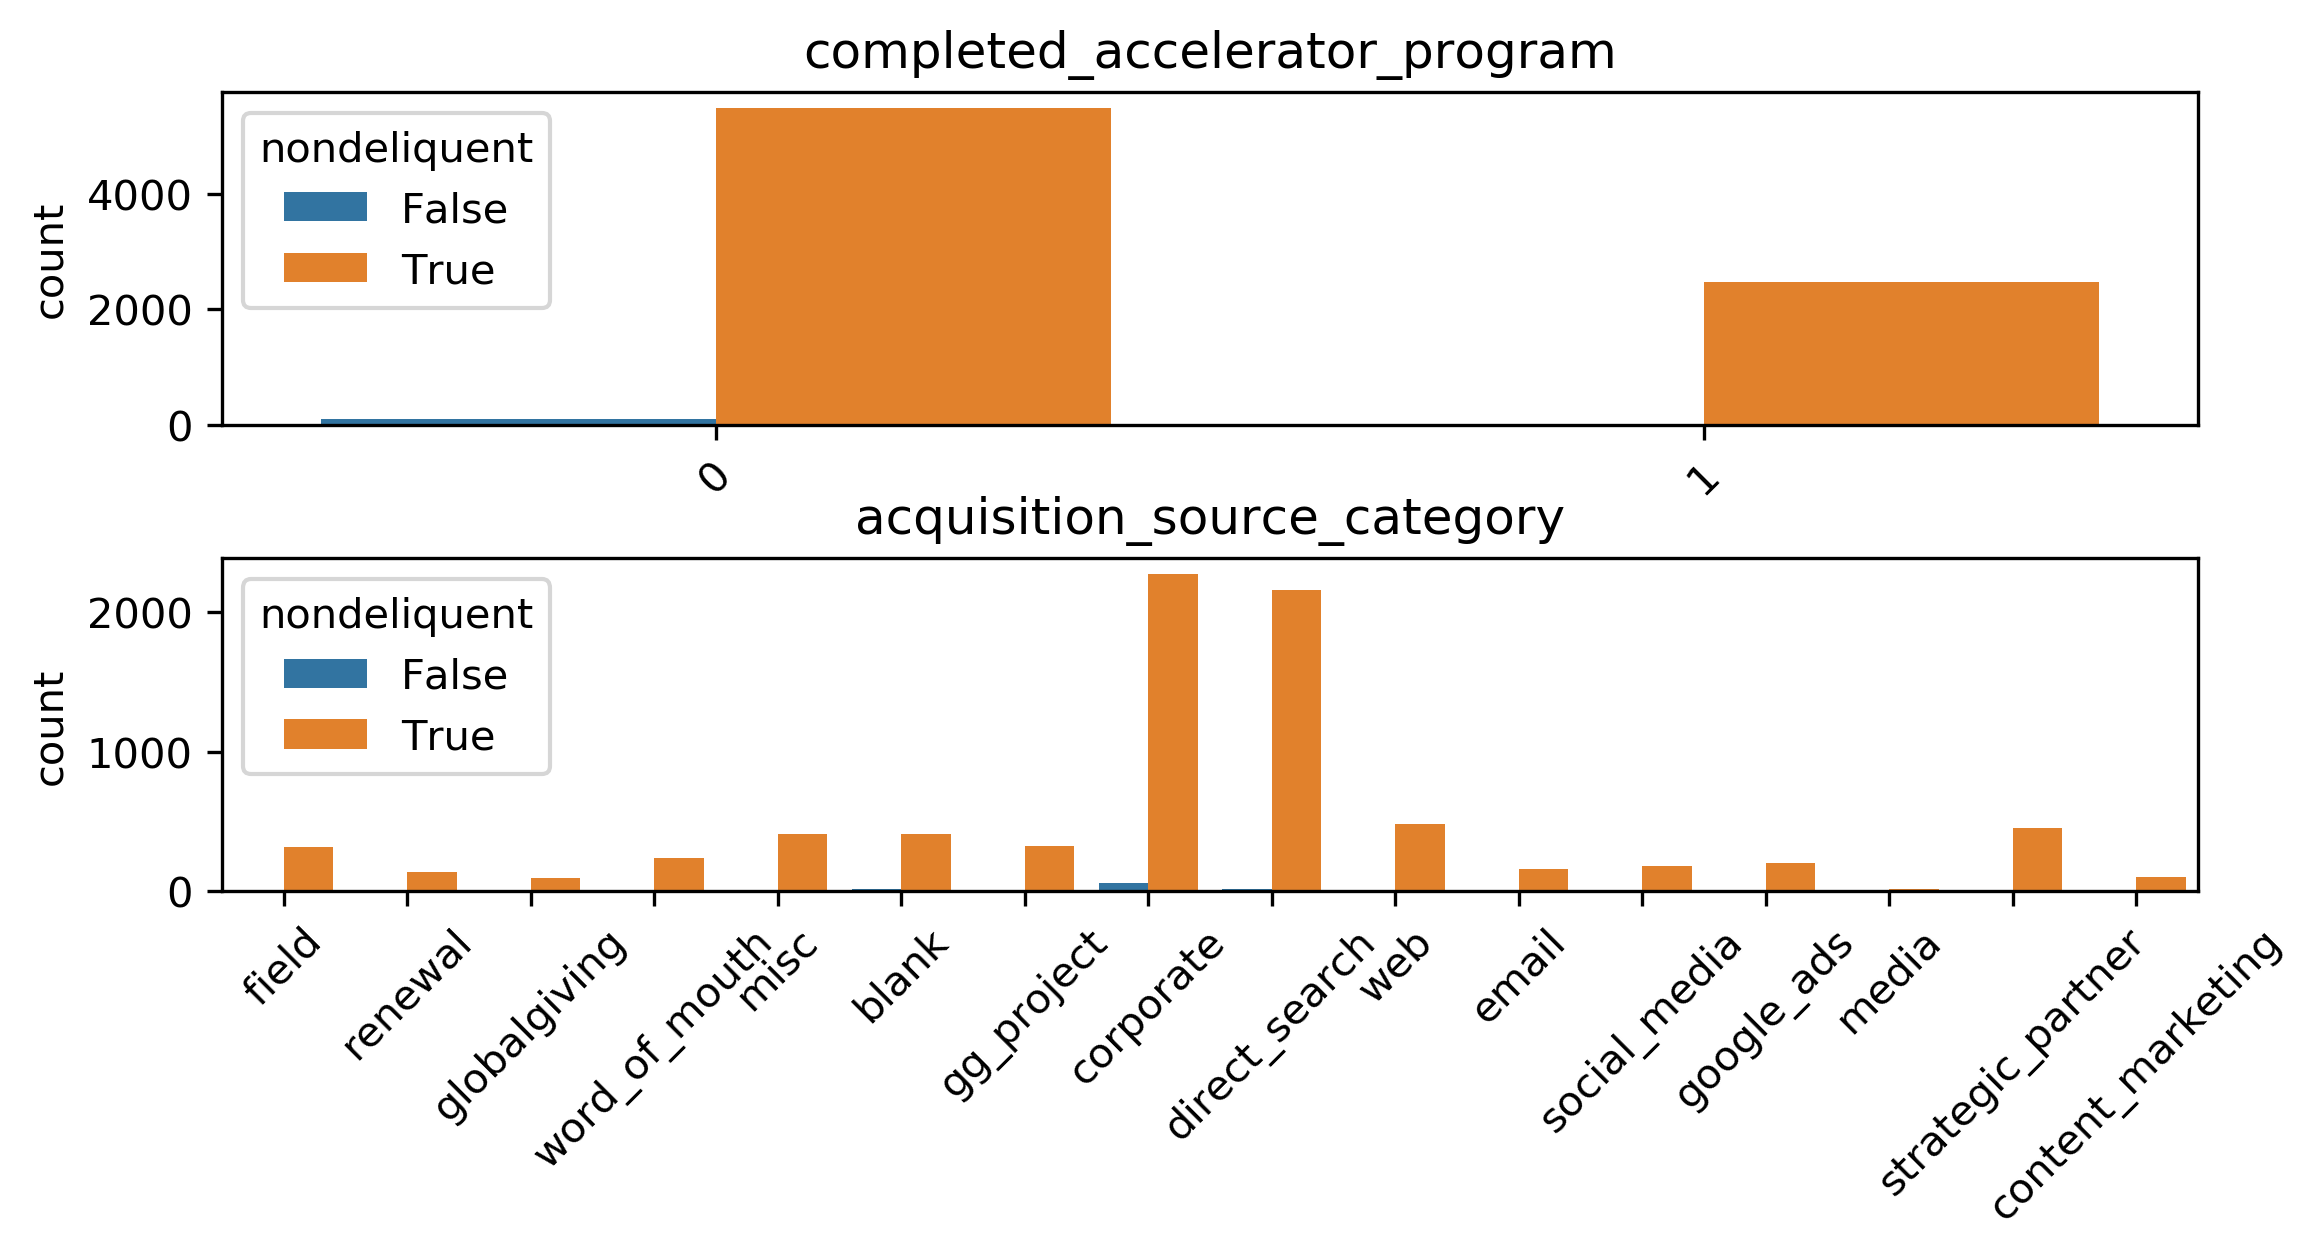

In [321]:
# Proportion plots for the categorical variables for nondeliquent metric
fig = plt.figure(figsize = (8.5, 20), dpi=300)
fig.subplots_adjust(hspace = 0.4)
i=1
for column in ['completed_accelerator_program',
               'acquisition_source_category']:
    ax = plt.subplot(10,1,i)
    sns.countplot(x=column, hue="nondeliquent", data=active_beginning, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    plt.xticks(rotation=45)
    i+= 1

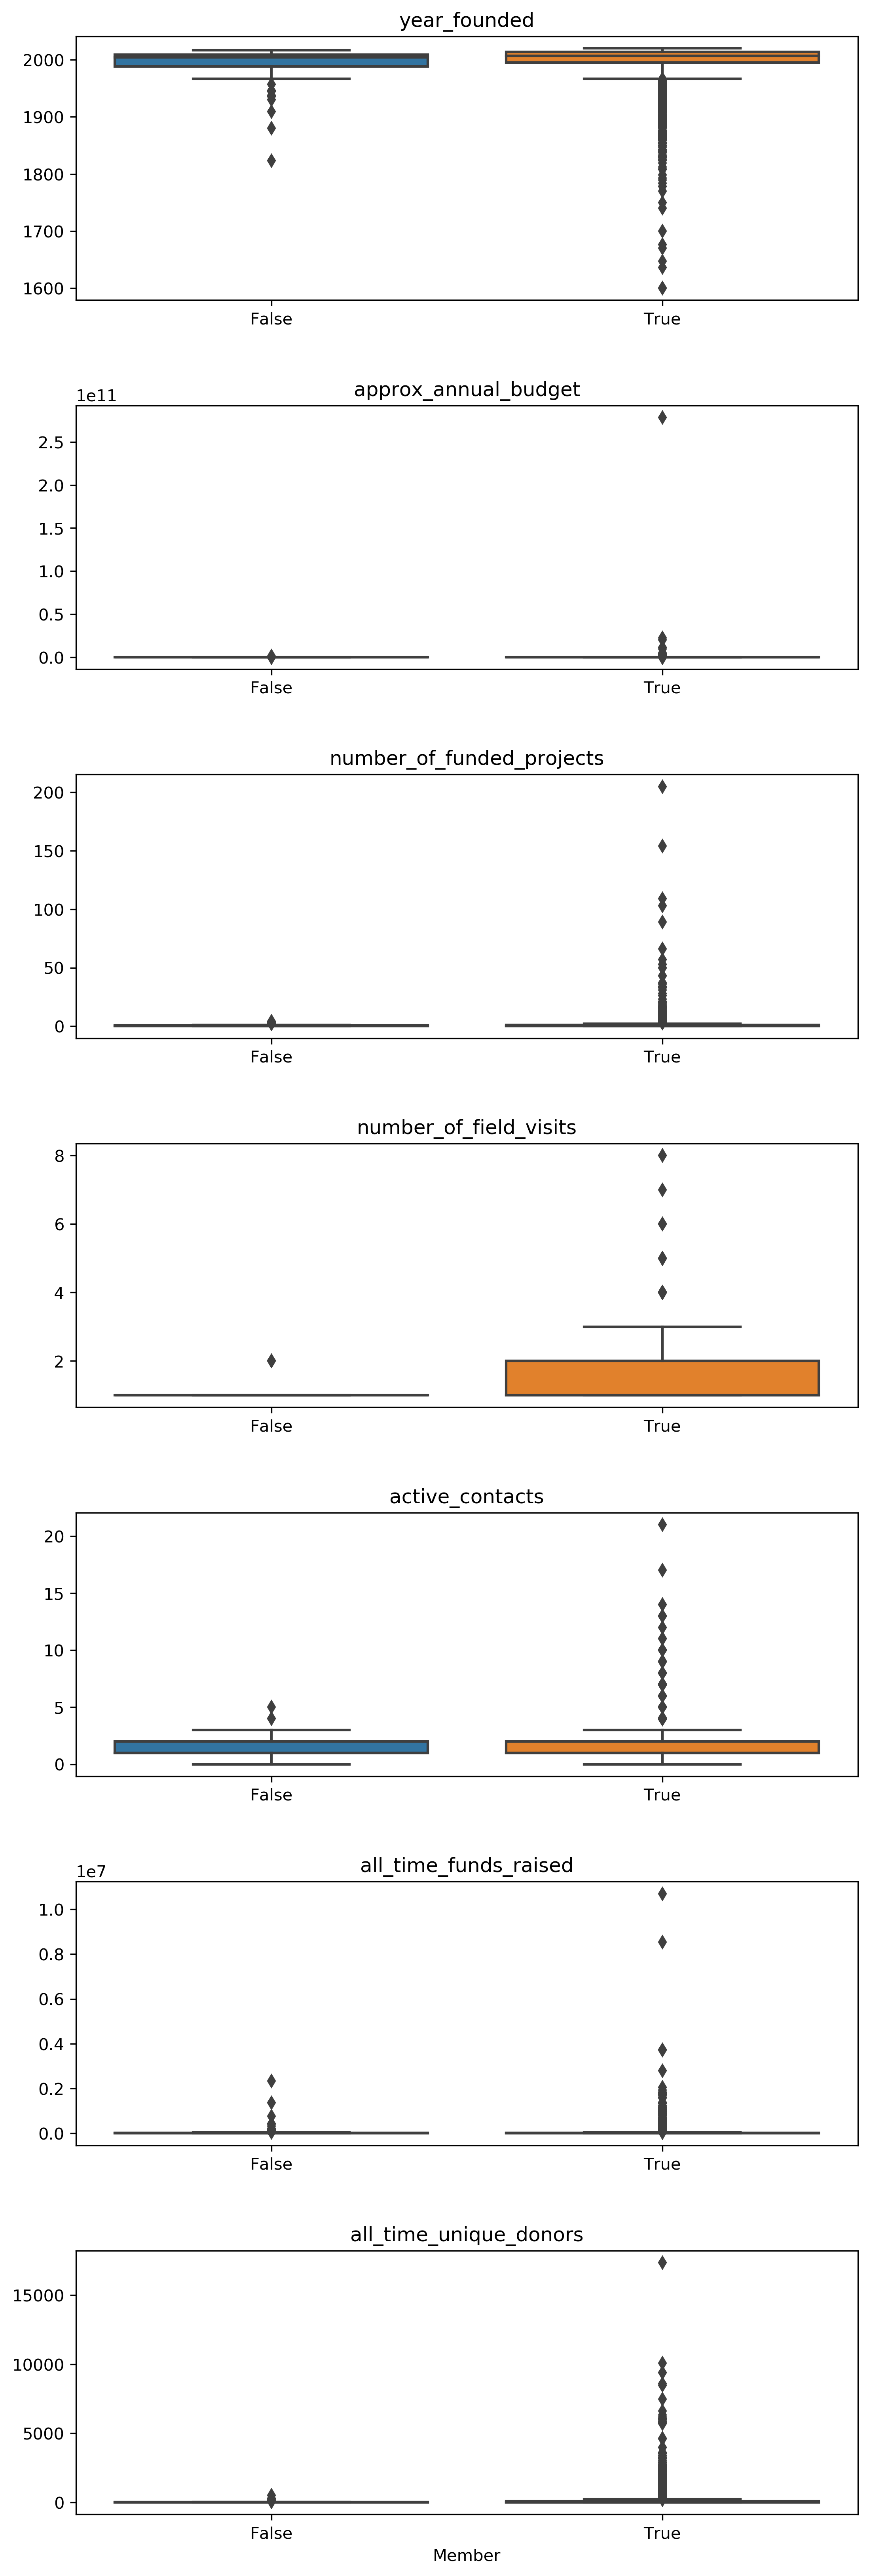

In [322]:
# Boxplots for the continuous variables for nondeliquent metric
fig = plt.figure(figsize = (8.5, 40), dpi=300)
fig.subplots_adjust(hspace = 0.4)
i=1
for column in ['year_founded','approx_annual_budget',
               'number_of_funded_projects','number_of_field_visits',
               'active_contacts','all_time_funds_raised',
               'all_time_unique_donors']:
    ax = plt.subplot(10,1,i)
    sns.boxplot(y=column, x="nondeliquent", data=active_beginning)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
    i+= 1
ax.set_xlabel('Member')

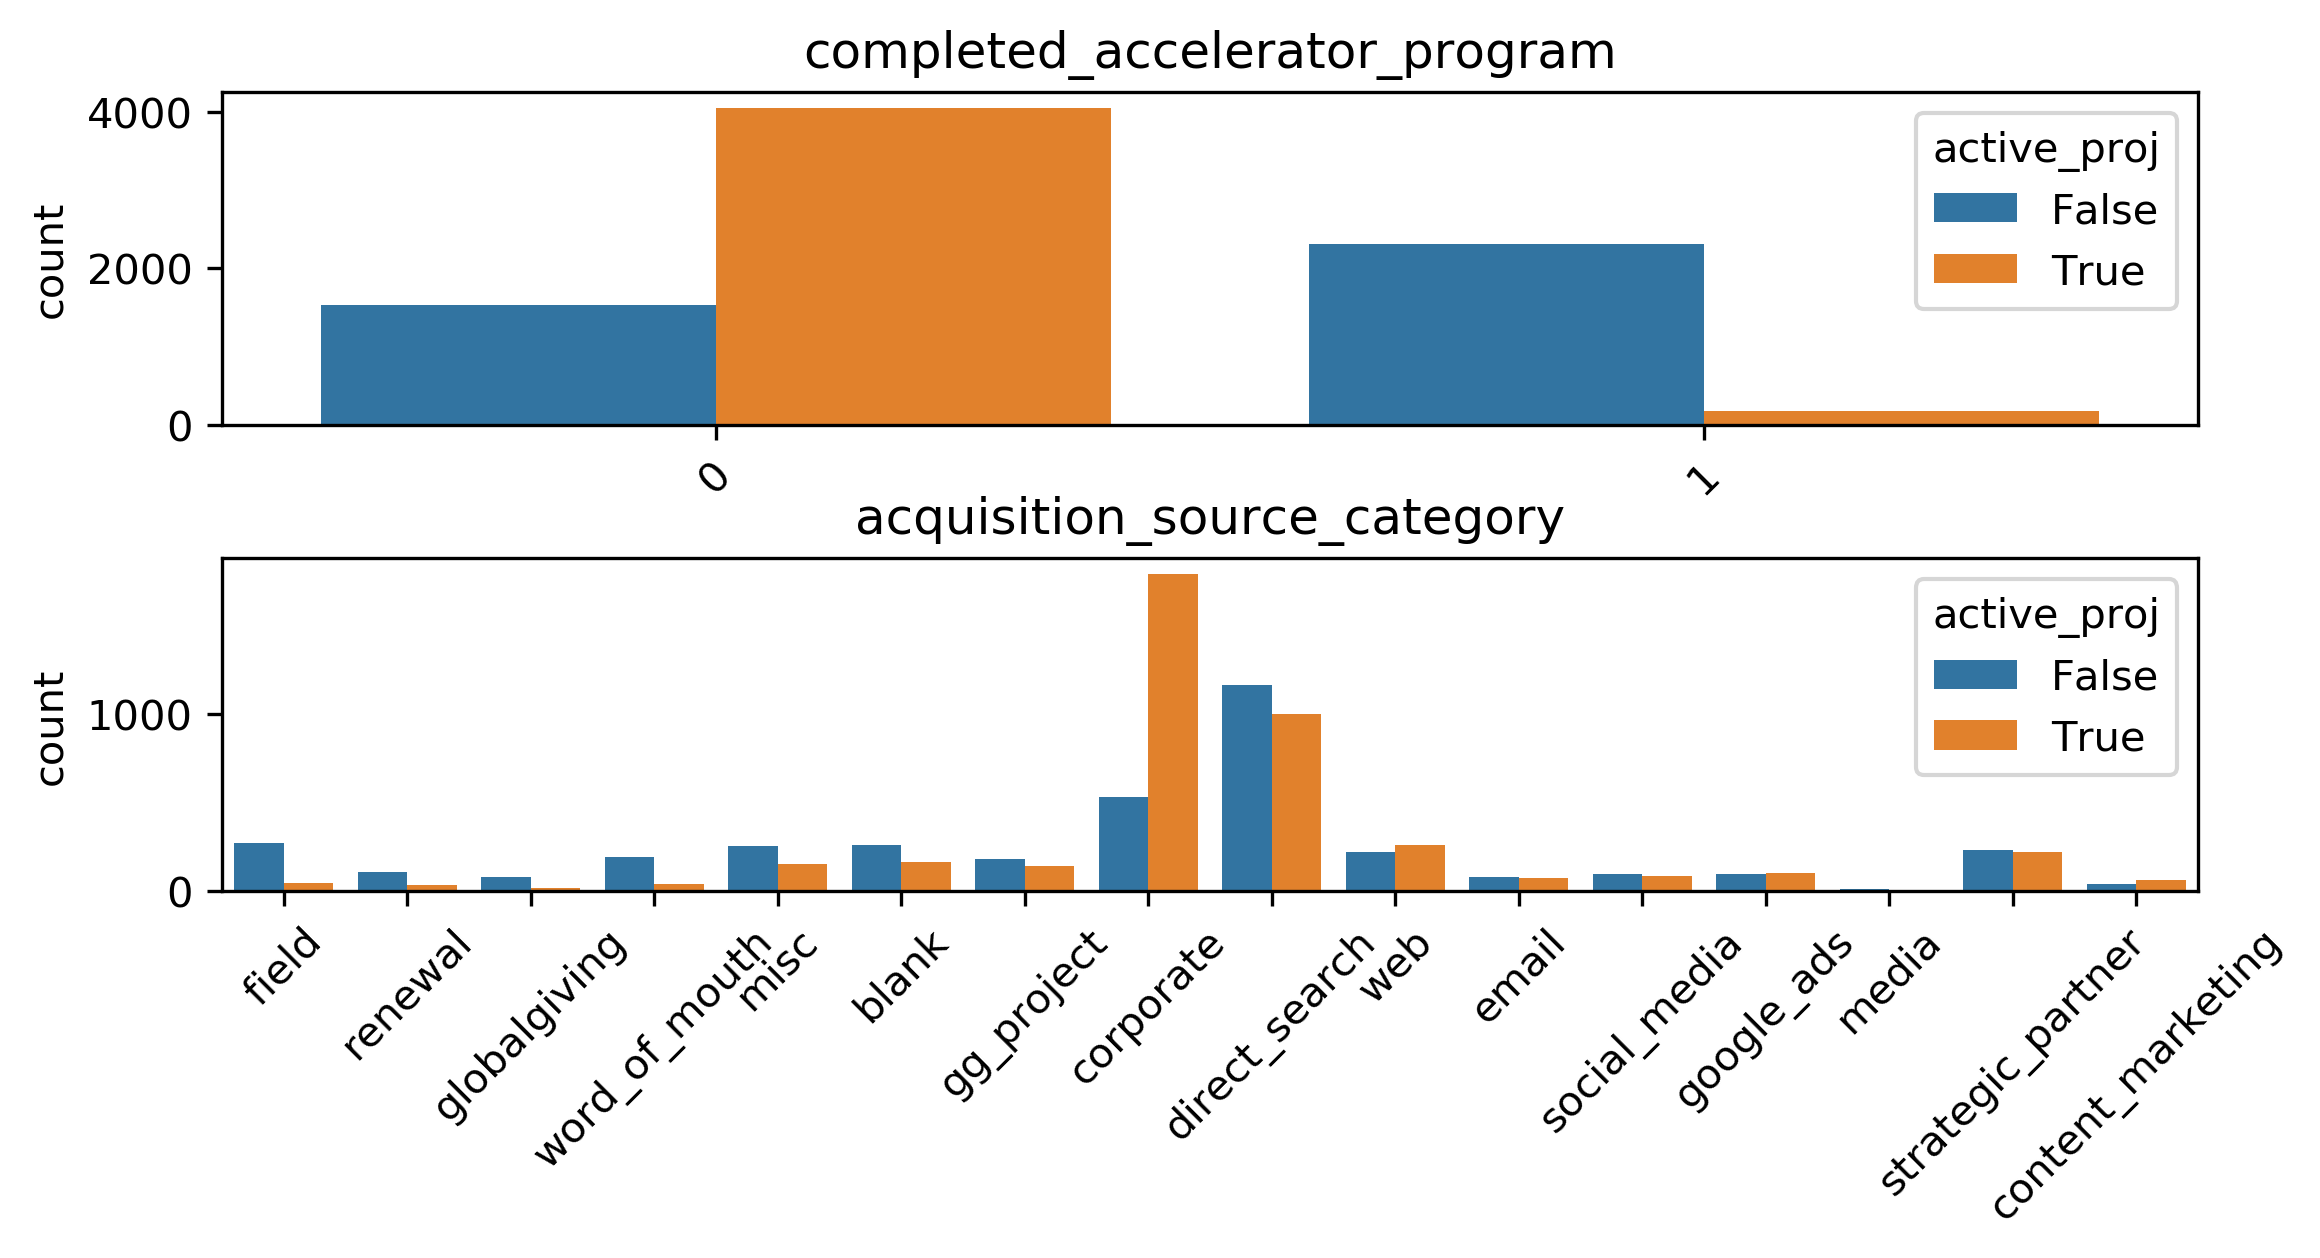

In [323]:
# Proportion plots for the categorical variables for active project metric
fig = plt.figure(figsize = (8.5, 20), dpi=300)
fig.subplots_adjust(hspace = 0.4)
i=1
for column in ['completed_accelerator_program',
               'acquisition_source_category']:
    ax = plt.subplot(10,1,i)
    sns.countplot(x=column, hue="active_proj", data=active_beginning, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    plt.xticks(rotation=45)
    i+= 1

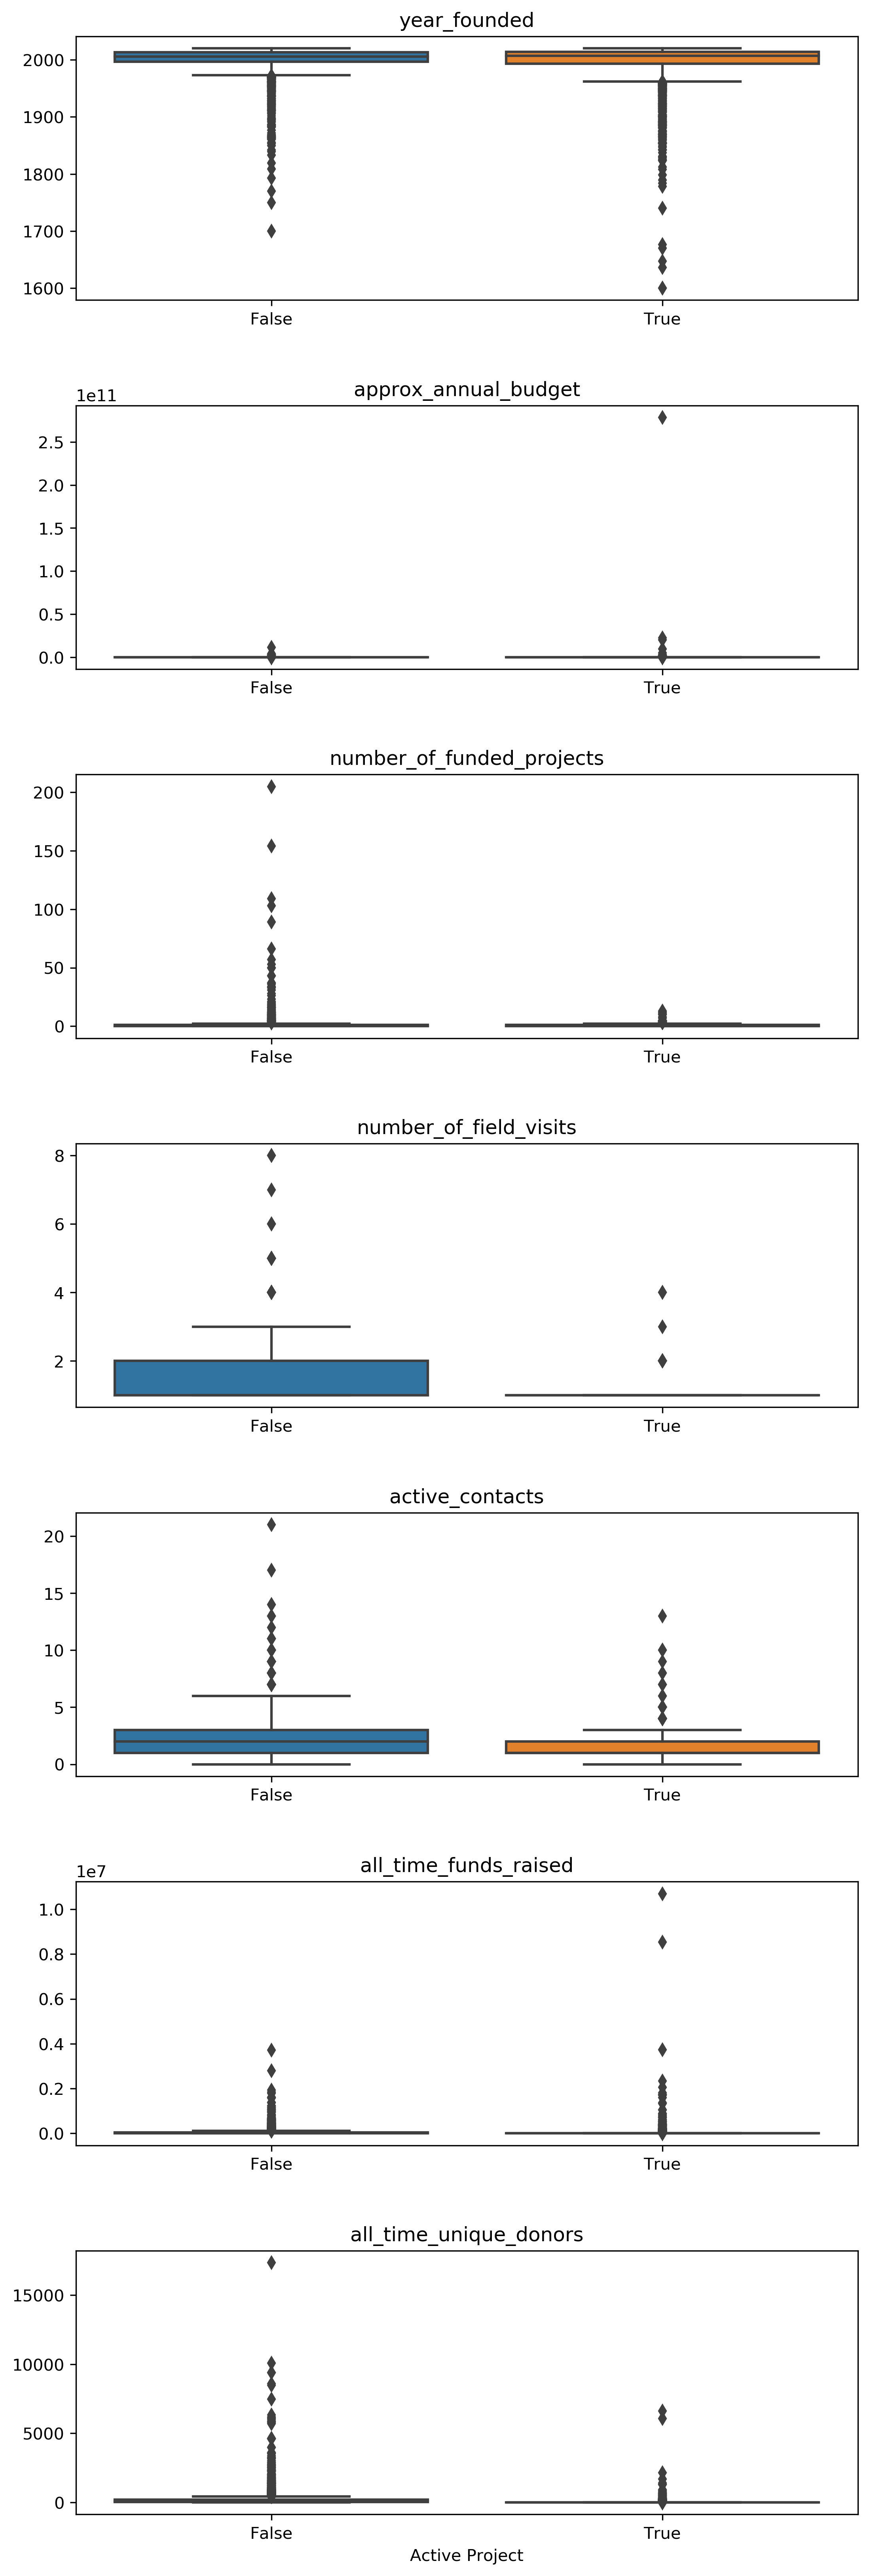

In [324]:
# Boxplots for the continuous variables for active project metric
fig = plt.figure(figsize = (8.5, 40), dpi=300)
fig.subplots_adjust(hspace = 0.4)
i=1
for column in ['year_founded','approx_annual_budget',
               'number_of_funded_projects','number_of_field_visits',
               'active_contacts','all_time_funds_raised',
               'all_time_unique_donors']:
    ax = plt.subplot(10,1,i)
    sns.boxplot(y=column, x="active_proj", data=active_beginning)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
    i+= 1
ax.set_xlabel('Active Project')

## Develop proof-of-concept visualization for tracking retention and factors impacting retention

Define functions for calculating retention metrics, which will be applied to different subsets of the data

In [325]:
def nonqeliquent_metric_calc(data):
    nondeliquent_percent = round((len(data[data['nondeliquent']])/
                                            len(data.index))*100, 2)
    return(nondeliquent_percent)

def activeproj_metric_calc(data):
    activeproj_percent = round((len(data[data['active_proj']])/
                                            len(data.index))*100, 2)
    return(activeproj_percent)

Produce summary plots for retention of partners as active community members

In [326]:
acc_nondeliq = active_beginning.groupby('completed_accelerator_program').apply(nonqeliquent_metric_calc)
acc_nondeliq = pd.DataFrame({'retention': acc_nondeliq,
                            'acc': acc_nondeliq.index})
acc_nondeliq.replace(0, 'No', inplace=True)
acc_nondeliq.replace(1, 'Yes', inplace=True)

acq_nondeliq = active_beginning.groupby('acquisition_source_category').apply(nonqeliquent_metric_calc)
acq_nondeliq = pd.DataFrame({'retention': acq_nondeliq,
                            'acq': acq_nondeliq.index})

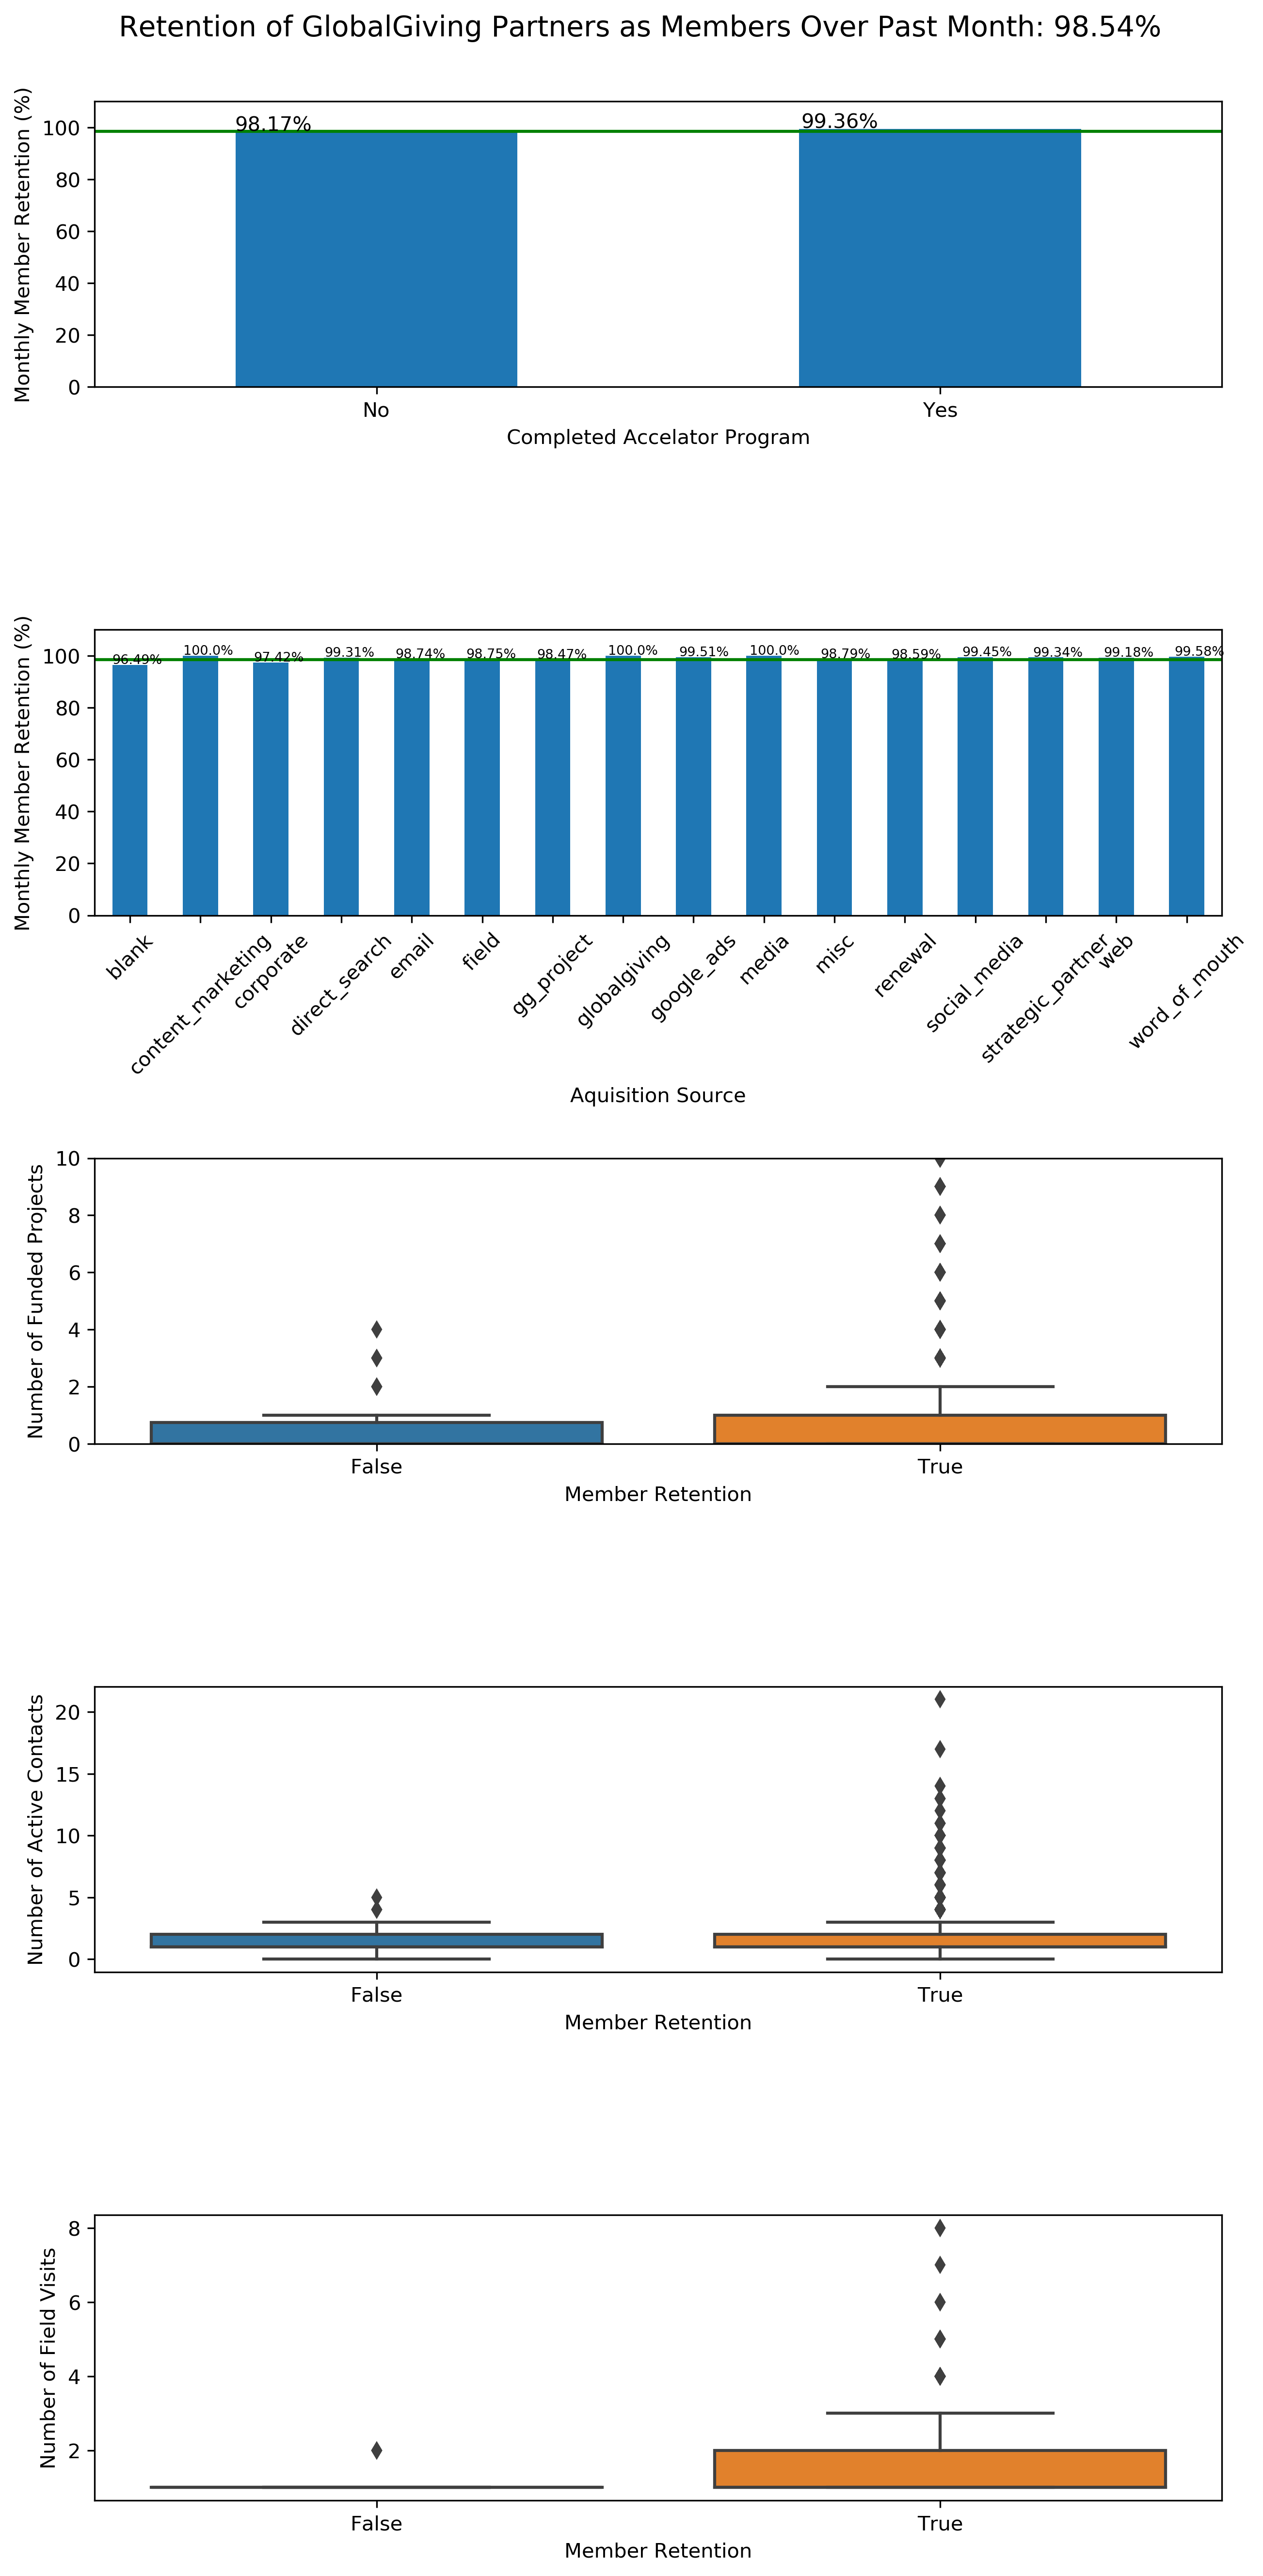

In [327]:
fig = plt.figure(figsize = (10, 20), dpi=300)
fig.subplots_adjust(hspace = 0.85, top=.95)

fig.suptitle("Retention of GlobalGiving Partners as Members Over Past Month: " + 
             str(retention_nondeliquent_percent) + '%', fontsize=14)

# Barchart of tetention of active members by accelator program completion
ax = plt.subplot(5,1,1)
acc_nondeliq.plot.bar(x='acc', y='retention', ax=ax, rot=0, legend=False)
ax.set_xlabel('Completed Accelator Program')
ax.set_ylabel('Monthly Member Retention (%)')
ax.set_ylim(0,110)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.axhline(retention_nondeliquent_percent, color='g')# horizontal line at the overall retention rate for reference
    
# Barchart of retention of active members by acquisition source
ax = plt.subplot(5,1,2)
acq_nondeliq.plot.bar(x='acq', y='retention', ax=ax, rot=0, legend=False)
ax.set_xlabel('Aquisition Source')
ax.set_ylabel('Monthly Member Retention (%)')
plt.xticks(rotation=45)
ax.set_ylim(0,110)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005),
               size=6.5)
plt.axhline(retention_nondeliquent_percent, color='g')# horizontal line at the overall retention rate for reference
    
# Boxplots of funded projects by active member status
ax = plt.subplot(5,1,3)
sns.boxplot(y='number_of_funded_projects', x="nondeliquent", data=active_beginning, ax=ax)
ax.set_xlabel('Member Retention')
ax.set_ylabel('Number of Funded Projects')
ax.set_ylim(0,10)

# Boxplots of field visits by active member status
ax = plt.subplot(5,1,5)
sns.boxplot(y='number_of_field_visits', x="nondeliquent", data=active_beginning, ax=ax)
ax.set_xlabel('Member Retention')
ax.set_ylabel('Number of Field Visits')

# Boxplots of active contacts by active member status
ax = plt.subplot(5,1,4)
sns.boxplot(y='active_contacts', x="nondeliquent", data=active_beginning, ax=ax)
ax.set_xlabel('Member Retention')
ax.set_ylabel('Number of Active Contacts')

# Save the figure
fig.savefig(wd + "active_member_plot.jpg", bbox_inches='tight')

Produce summary plots for retention of partners actively posting projects

In [328]:
acc_activeproj = active_beginning.groupby('completed_accelerator_program').apply(activeproj_metric_calc)
acc_activeproj = pd.DataFrame({'retention': acc_activeproj,
                            'acc': acc_activeproj.index})
acc_activeproj.replace(0, 'No', inplace=True)
acc_activeproj.replace(1, 'Yes', inplace=True)

acq_activeproj = active_beginning.groupby('acquisition_source_category').apply(activeproj_metric_calc)
acq_activeproj = pd.DataFrame({'retention': acq_activeproj,
                            'acq': acq_activeproj.index})

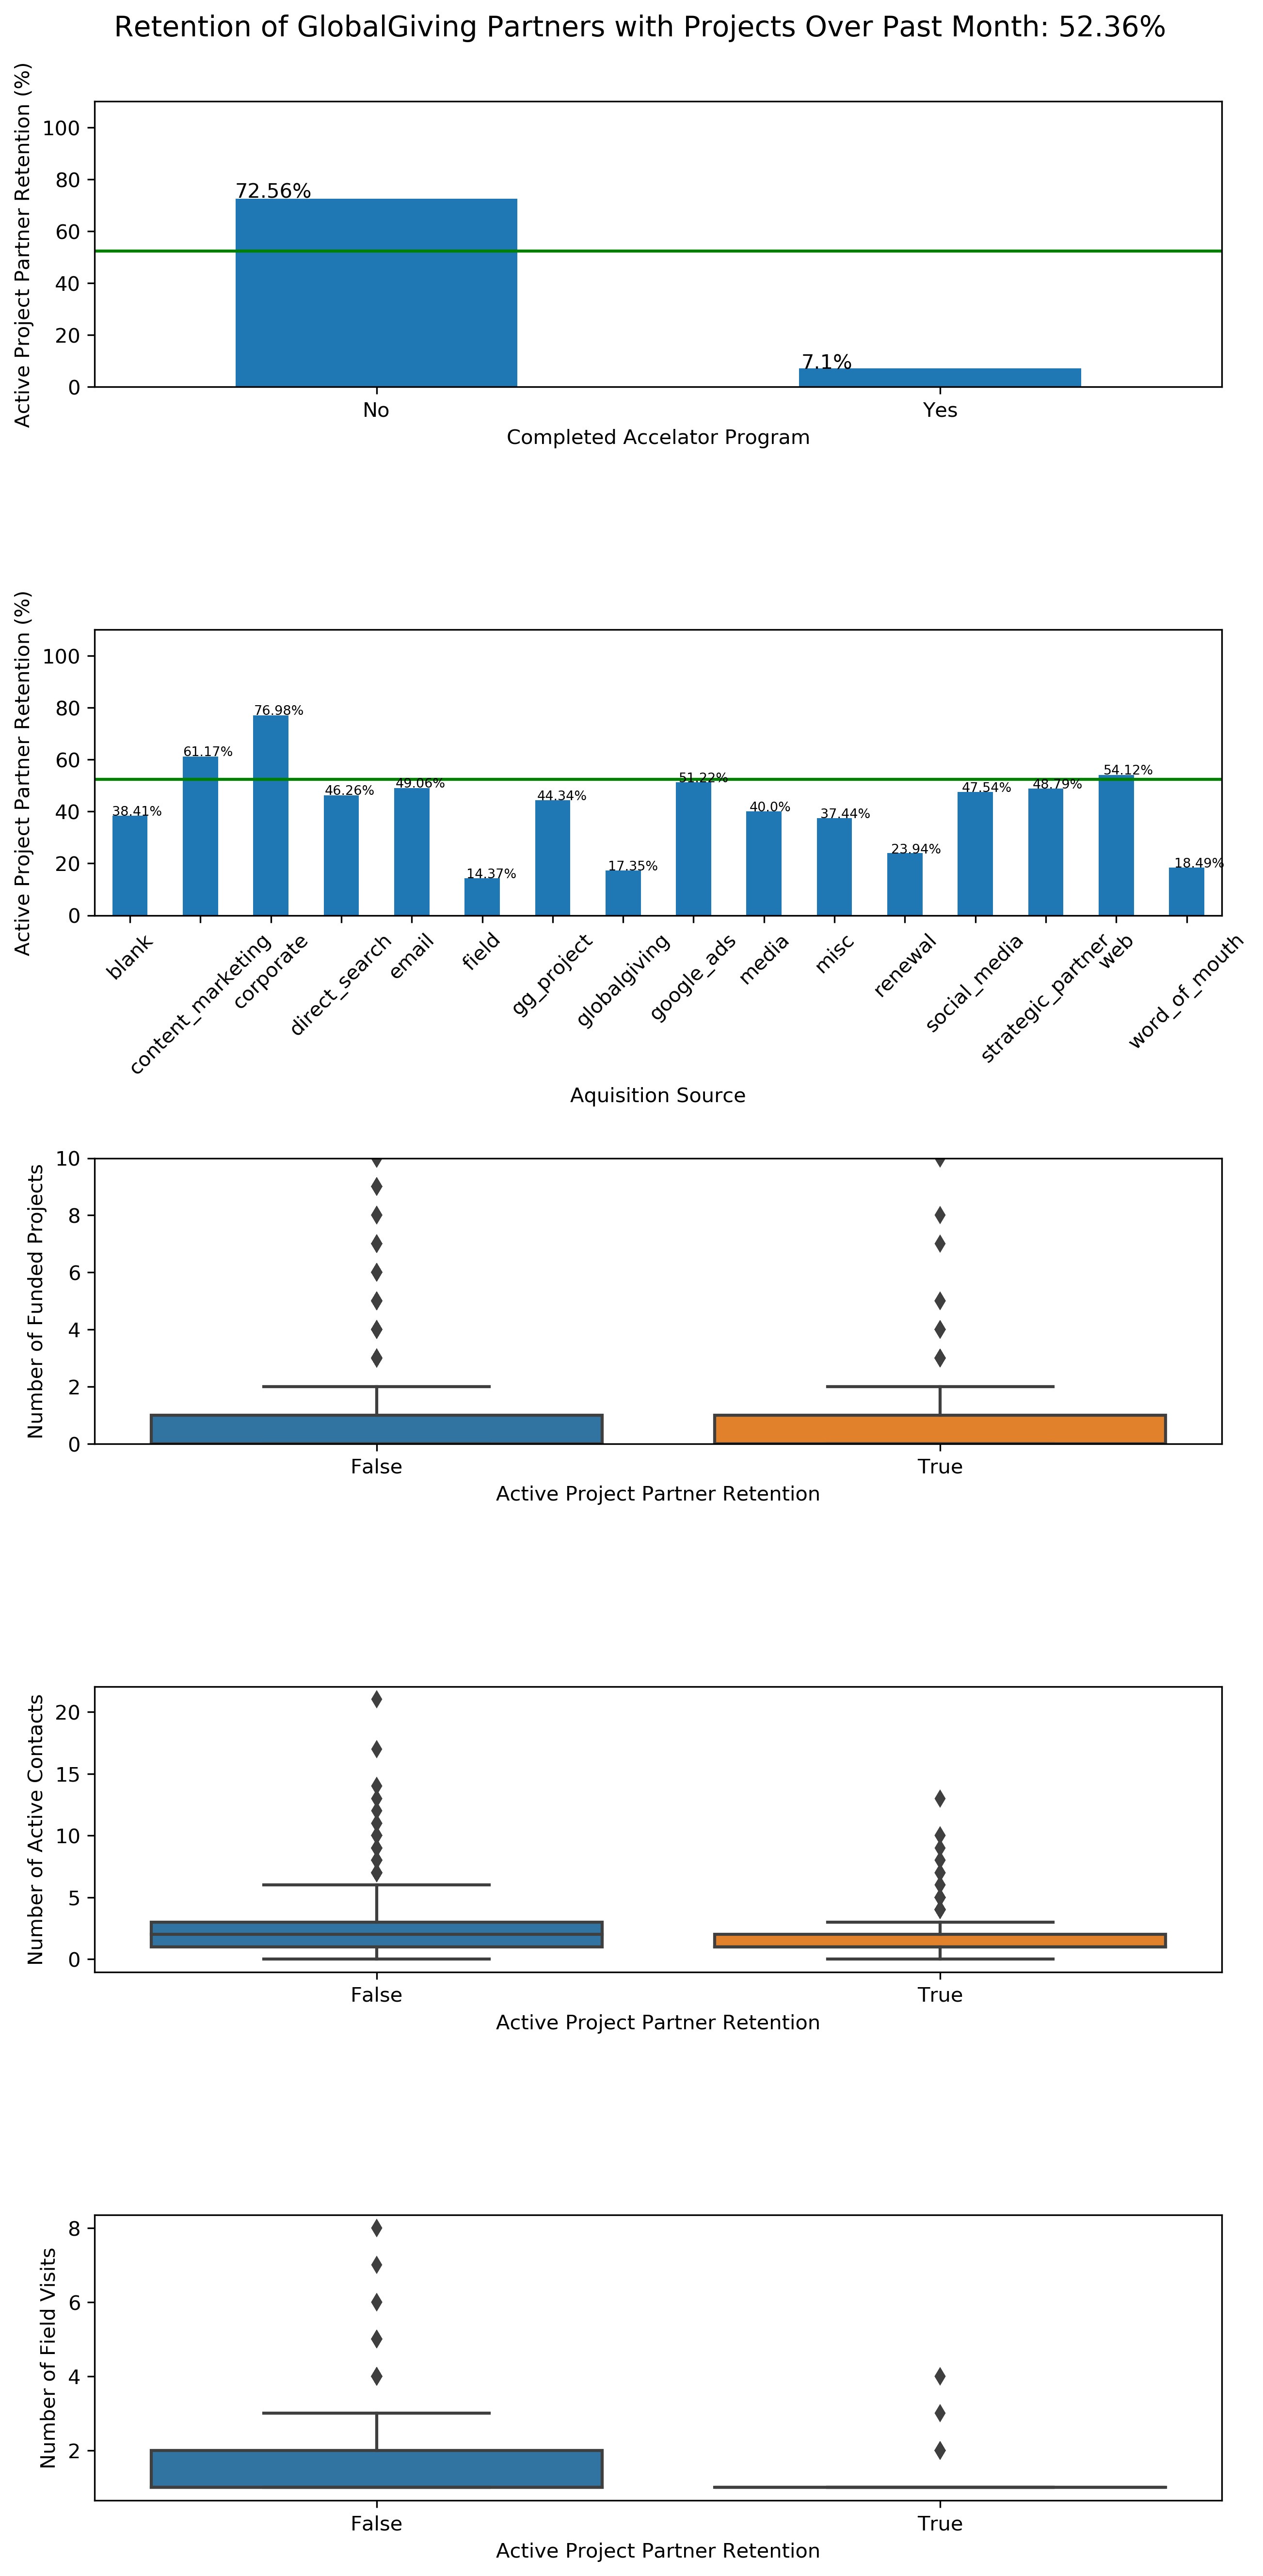

In [329]:
fig = plt.figure(figsize = (10, 20), dpi=300)
fig.subplots_adjust(hspace = 0.85, top=.95)

fig.suptitle("Retention of GlobalGiving Partners with Projects Over Past Month: " + 
             str(retention_activeproj_percent) + '%', fontsize=14)

# Barchart of retention of members with project by accelator program completion
ax = plt.subplot(5,1,1)
acc_activeproj.plot.bar(x='acc', y='retention', ax=ax, rot=0, legend=False)
ax.set_xlabel('Completed Accelator Program')
ax.set_ylabel('Active Project Partner Retention (%)')
ax.set_ylim(0,110)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.axhline(retention_activeproj_percent, color='g')# horizontal line at the overall retention rate for reference
    
# Barchart of retention of members with project by acquisition source
ax = plt.subplot(5,1,2)
acq_activeproj.plot.bar(x='acq', y='retention', ax=ax, rot=0, legend=False)
ax.set_xlabel('Aquisition Source')
ax.set_ylabel('Active Project Partner Retention (%)')
plt.xticks(rotation=45)
ax.set_ylim(0,110)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005),
               size=6.5)
plt.axhline(retention_activeproj_percent, color='g')# horizontal line at the overall retention rate for reference
    
# Boxplots of funded projects by members with/without project in past month
ax = plt.subplot(5,1,3)
sns.boxplot(y='number_of_funded_projects', x="active_proj", data=active_beginning, ax=ax)
ax.set_xlabel('Active Project Partner Retention')
ax.set_ylabel('Number of Funded Projects')
ax.set_ylim(0,10)

# Boxplots of field visits by members with/without project in past month
ax = plt.subplot(5,1,5)
sns.boxplot(y='number_of_field_visits', x="active_proj", data=active_beginning, ax=ax)
ax.set_xlabel('Active Project Partner Retention')
ax.set_ylabel('Number of Field Visits')

# Boxplots of active contacts by members with/without project in past month
ax = plt.subplot(5,1,4)
sns.boxplot(y='active_contacts', x="active_proj", data=active_beginning, ax=ax)
ax.set_xlabel('Active Project Partner Retention')
ax.set_ylabel('Number of Active Contacts')

# Save the figure
fig.savefig(wd + "active_project_plot.jpg", bbox_inches='tight')